# 20MAI0005
# Abhishek Kumar


# 1. Load all the libraries

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


# 2. Data Loading and Exploration

In [3]:
# modify to fit your system
fpath = 'image_3'

In [4]:

random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound'] 

No. of categories =  20


In [5]:
# Display the total images in the database, size of the image, no of classes in the database
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))


No. of images loaded =  3633 
No. of labels loaded =  3633
<class 'list'> <class 'list'>


In [6]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3633, 227, 227, 3) 
Labels shape =  (3633,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


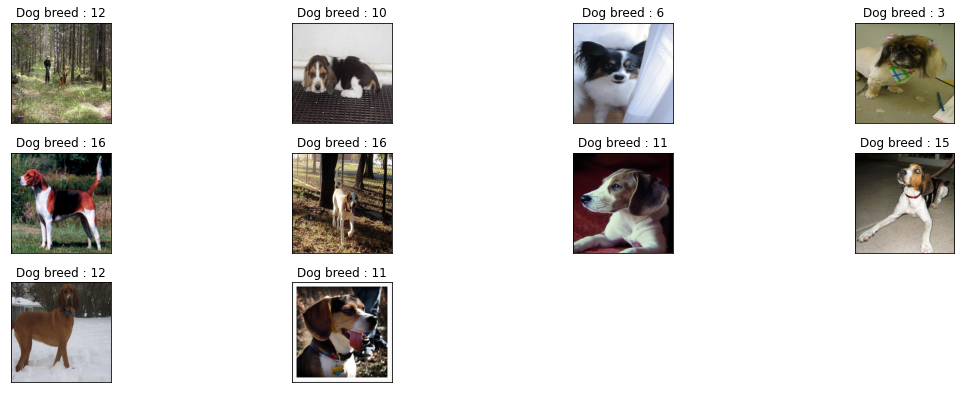

In [7]:
#Display sample input and output images (at least 10 images).
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 9))
    n = 0 
    for i in range(10):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# 3. Preparing data for training the Alexnet CNN model

In [8]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3630 3631 3632]

'n' values after shuffling =  [2178  183  184 ...  860 3507 3174]


In [9]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3633, 227, 227, 3) 
Labels shape after shuffling =  (3633,)


In [10]:
#Data Normalization
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3633, 227, 227, 3)


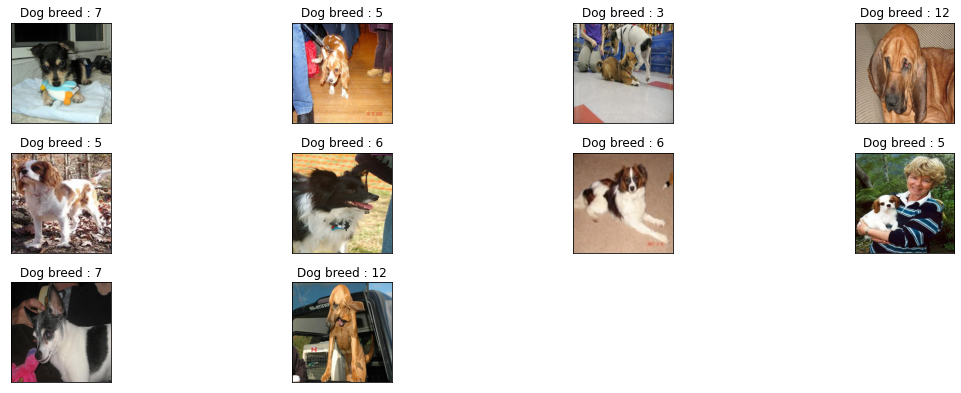

In [11]:
#Display few images after normalization
display_rand_images(images, labels)

In [12]:
#Split loaded dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2906, 227, 227, 3)
y_train shape =  (2906,)

x_test shape =  (727, 227, 227, 3)
y_test shape =  (727,)


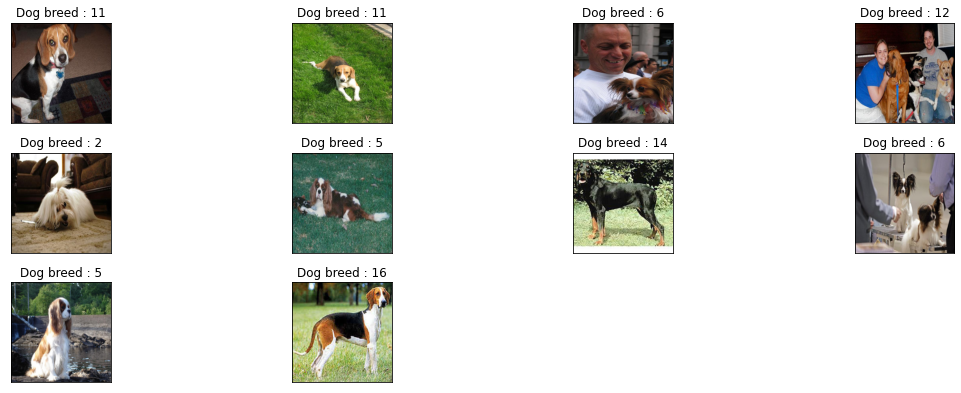

In [13]:
#Display train random images
display_rand_images(x_train, y_train)

# 4. Define Alexnet CNN model

[[[ 9.09465738e-03 -3.95154953e-03  1.67558622e-02 ...  2.02904996e-02
    1.27150435e-02 -1.84260812e-02]
  [ 7.11433589e-03  1.26111638e-02 -6.17878512e-03 ...  9.38493945e-03
   -7.13802595e-03  9.66544263e-03]
  [ 1.42475218e-03  1.08412299e-02 -1.43788215e-02 ...  3.29381786e-03
    1.84188969e-03 -4.69695032e-03]
  ...
  [-2.18821410e-02 -7.93741457e-03  2.14293804e-02 ... -1.90916397e-02
    3.36046889e-03  1.39716100e-02]
  [-6.90329075e-03  3.19561735e-03  1.51775498e-02 ...  4.92306799e-03
    2.11112369e-02 -1.66604668e-02]
  [-1.24566583e-02  3.10581923e-03  1.60960648e-02 ... -2.16777995e-02
    6.67561404e-03 -1.54770184e-02]]

 [[ 7.40796328e-03  1.31822582e-02 -2.13686116e-02 ... -2.15390399e-02
   -7.53979571e-03 -3.93264554e-03]
  [-1.39648430e-02 -1.40545182e-02  7.43616372e-03 ... -1.73378829e-02
    1.76128838e-02  9.08652134e-03]
  [ 1.73982251e-02  3.44967283e-03 -1.17341066e-02 ... -9.58671700e-03
   -1.48343500e-02  4.82859090e-03]
  ...
  [-1.90223809e-02  1.0

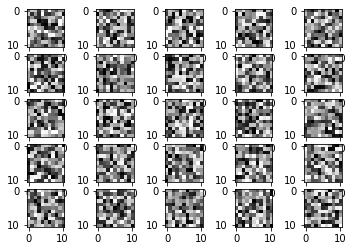

In [14]:
Alexnet=Sequential()

#1 conv layer
x=Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3))
Alexnet.add(x)

xlw = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    print(xlw)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(xlw[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

#1 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#2 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#3 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())


Alexnet.add(Flatten())

#1 dense layer
Alexnet.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#2 dense layer
Alexnet.add(Dense(4096,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#3 dense layer
Alexnet.add(Dense(1000,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#output layer
Alexnet.add(Dense(20,activation="softmax"))



In [15]:
Alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [16]:
#Compile the CNN model
Alexnet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 5. Train the model

In [17]:
Alexnet.fit(x_train, y_train, epochs=20)

Epoch 1/20
91/91 [==============================] - 121s 1s/step - loss: 3.5653 - accuracy: 0.0929
Epoch 2/20
91/91 [==============================] - 113s 1s/step - loss: 3.1630 - accuracy: 0.1191
Epoch 3/20
91/91 [==============================] - 105s 1s/step - loss: 3.0270 - accuracy: 0.1401
Epoch 4/20
91/91 [==============================] - 105s 1s/step - loss: 2.9321 - accuracy: 0.1555
Epoch 5/20
91/91 [==============================] - 104s 1s/step - loss: 2.8393 - accuracy: 0.1714
Epoch 6/20
91/91 [==============================] - 104s 1s/step - loss: 2.7636 - accuracy: 0.1968
Epoch 7/20
91/91 [==============================] - 105s 1s/step - loss: 2.7182 - accuracy: 0.2010
Epoch 8/20
91/91 [==============================] - 104s 1s/step - loss: 2.6529 - accuracy: 0.2127
Epoch 9/20
91/91 [==============================] - 104s 1s/step - loss: 2.5670 - accuracy: 0.2381
Epoch 10/20
91/91 [==============================] - 104s 1s/step - loss: 2.4727 - accuracy: 0.2536
Epoch 11/

In [18]:
#Metrics to evalvuate Loss and accuracy
loss, accuracy = Alexnet.evaluate(x_test, y_test)

23/23 [==============================] - 4s 192ms/step - loss: 3.5547 - accuracy: 0.2600


In [19]:
print(loss,accuracy)


3.5547022819519043 0.259972482919693


# 6. Predicted values using trained model

In [20]:
pred = Alexnet.predict(x_test)

pred.shape

(727, 20)

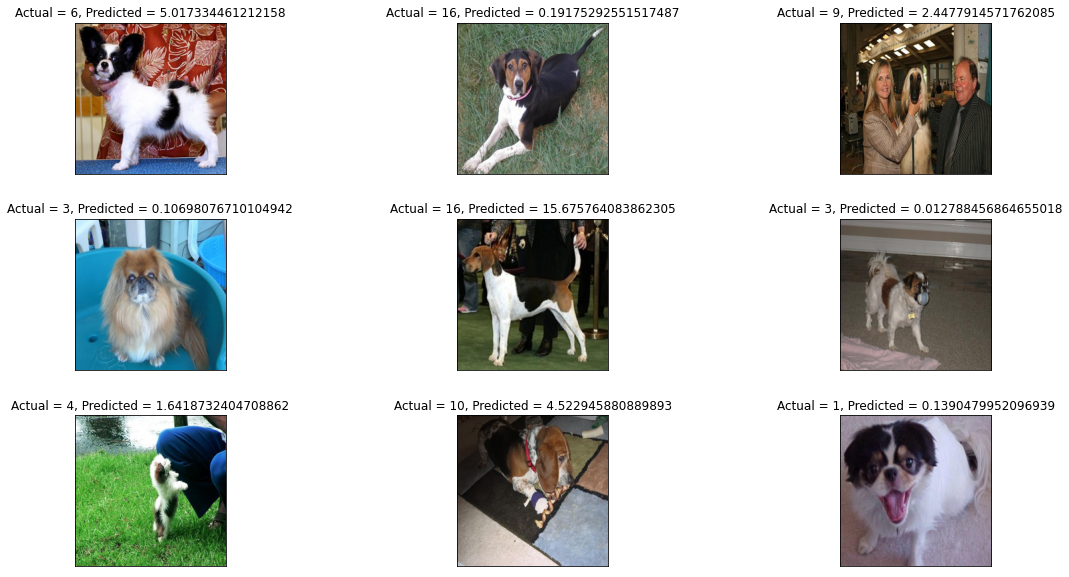

In [21]:
#Display few random images with actual vs predicted values of labels
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()